In [5]:
import numpy as np
import pandas as pd
import pickle
import re
from collections import Counter
from plot_utils import plt, legend_opts
import plot_utils
eps = '\u0395'

## Spliting dataset to train : dev

In [2]:
!python utils.py sample-data/spa spa -s 1 1
!python utils.py sample-data/eng eng -s 1 1
!python utils.py sample-data/ben ben -s 1 1
!python utils.py sample-data/grc grc -s 1 1
!python utils.py sample-data/ell ell -s 1 1

spa language data splited into train:dev = 2730:2730 ratio
eng language data splited into train:dev = 11382:11383 ratio
ben language data splited into train:dev = 68:68 ratio
grc language data splited into train:dev = 1215:1216 ratio
ell language data splited into train:dev = 5953:5953 ratio


## Generating <prefix, stem_changre, suffix> triplets

In [10]:
!python data_preprocess.py sample-data/spa spa
!python data_preprocess.py sample-data/eng eng
!python data_preprocess.py sample-data/ben ben
!python data_preprocess.py sample-data/grc grc
!python data_preprocess.py sample-data/ell ell

Total 248073 <prefix, stem_change, suffix> triplet generated for spa language train data
Total 99527 <prefix, stem_change, suffix> triplet generated for eng language train data
Total 2745 <prefix, stem_change, suffix> triplet generated for ben language train data
Total 24509 <prefix, stem_change, suffix> triplet generated for grc language train data
Total 104724 <prefix, stem_change, suffix> triplet generated for ell language train data


## Creating probability dataframe for train data

In [11]:
!python utils.py sample-data/ben ben -p train
!python utils.py sample-data/eng eng -p train
!python utils.py sample-data/spa spa -p train
!python utils.py sample-data/grc grc -p train
!python utils.py sample-data/ell ell -p train

ben Train probability dataframe shape (2745, 13)
eng Train probability dataframe shape (99527, 13)
spa Train probability dataframe shape (248073, 13)
grc Train probability dataframe shape (24509, 13)
ell Train probability dataframe shape (104724, 13)


In [12]:
langs = ["eng","spa","ell","ben","grc"]
L=langs[0]

## Train probability columns 
- n3_pscs =  $p (root_{last 3 char}| prefix, stem-change, suffix)$
- n2_pscs =  $p (root_{last 2 char}| prefix, stem-change, suffix)$
- n1_pscs =  $p (root_{last 1 char}| prefix, stem-change, suffix)$
- sc_ps   =  $p (stem-change| prefix, suffix)$
- p_sc    =  $p (stem-change)$

In [13]:
with open("sample-data/"+L+"/"+L+"-train-proba.pickle", 'rb') as outp:
    L_train_proba = pickle.load(outp)
L_train_proba.head(10)

,input,output,n3,n2,n1,prefix,stem_change,suffix,n3_pscs,n2_pscs,n1_pscs,sc_ps,p_sc
0,rabbet,rabbeted,bet,et,t,Ε,Ε->Ε,ed,0.000630,0.016387,0.201366,0.450118,0.508375
1,rabbet,rabbeted,bet,et,t,Ε,t->Ε,ted,0.003130,0.081377,1.000000,0.860027,0.046641
2,rabbet,rabbeted,bet,et,t,Ε,Ε->Ε,ed,0.000630,0.016387,0.201366,0.450118,0.508375
3,rabbet,rabbeted,bet,et,t,Ε,t->Ε,ted,0.003130,0.081377,1.000000,0.860027,0.046641
4,rabbet,rabbeting,bet,et,t,Ε,Ε->Ε,ing,0.000546,0.014925,0.180743,0.479030,0.508375
5,rabbet,rabbeting,bet,et,t,Ε,t->Ε,ting,0.003021,0.082578,1.000000,0.826811,0.046641
6,rabbet,rabbets,bet,et,t,Ε,Ε->Ε,s,0.000386,0.011189,0.114594,0.999614,0.508375
7,rabbet,rabbets,bet,et,t,Ε,t->Ε,ts,0.003367,0.097643,1.000000,1.000000,0.046641
8,rabbet,rabbet,bet,et,t,Ε,Ε->Ε,Ε,0.000513,0.012484,0.115690,0.996082,0.508375
9,sess,sessed,ess,ss,s,Ε,Ε->Ε,ed,0.011975,0.021429,0.027311,0.450118,0.508375


## Generating probability dataframe for dev data using train probability

In [14]:
!python utils.py sample-data/ben ben -p dev
!python utils.py sample-data/eng eng -p dev
# !python utils.py sample-data/spa spa -p dev
# !python utils.py sample-data/grc grc -p dev
# !python utils.py sample-data/ell ell -p dev

ben Dev probability dataframe shape (9245, 13)
eng Dev probability dataframe shape (438338, 13)


## dev probability columns
- n3_pscs = 𝑝(𝑟𝑜𝑜𝑡𝑙𝑎𝑠𝑡3𝑐ℎ𝑎𝑟|𝑝𝑟𝑒𝑓𝑖𝑥,𝑠𝑡𝑒𝑚−𝑐ℎ𝑎𝑛𝑔𝑒,𝑠𝑢𝑓𝑓𝑖𝑥)
- n2_pscs = 𝑝(𝑟𝑜𝑜𝑡𝑙𝑎𝑠𝑡2𝑐ℎ𝑎𝑟|𝑝𝑟𝑒𝑓𝑖𝑥,𝑠𝑡𝑒𝑚−𝑐ℎ𝑎𝑛𝑔𝑒,𝑠𝑢𝑓𝑓𝑖𝑥)
- n1_pscs = 𝑝(𝑟𝑜𝑜𝑡𝑙𝑎𝑠𝑡1𝑐ℎ𝑎𝑟|𝑝𝑟𝑒𝑓𝑖𝑥,𝑠𝑡𝑒𝑚−𝑐ℎ𝑎𝑛𝑔𝑒,𝑠𝑢𝑓𝑓𝑖𝑥)
- sc_ps = 𝑝(𝑠𝑡𝑒𝑚−𝑐ℎ𝑎𝑛𝑔𝑒|𝑝𝑟𝑒𝑓𝑖𝑥,𝑠𝑢𝑓𝑓𝑖𝑥)
- p_sc =  𝑝(𝑠𝑡𝑒𝑚−𝑐ℎ𝑎𝑛𝑔𝑒)

## In case of missing value:
- $ p(f) = 1/count(f_{unique})$

In [15]:
with open("sample-data/"+L+"/"+L+"-dev-proba.pickle", 'rb') as outp:
    L_dev_proba = pickle.load(outp)
L_dev_proba.head(10)

,input,output,n3,n2,n1,prefix,stem_change,suffix,n3_pscs,n2_pscs,n1_pscs,sc_ps,p_sc
0,categis,categised,gis,is,s,Ε,s->Ε,sed,0.000098,0.023077,1.000000,0.909091,0.005787
1,categiseve,categised,eve,ve,e,Ε,ve->Ε,d,0.000098,1.000000,1.000000,0.000599,0.000090
2,categise,categised,ise,se,e,Ε,Ε->Ε,d,0.089944,0.132794,0.999192,0.988413,0.508375
3,categiseed,categised,eed,ed,d,Ε,ed->Ε,d,1.000000,1.000000,1.000000,0.003596,0.000362
4,categisee,categised,see,ee,e,Ε,e->Ε,d,0.000098,0.333333,1.000000,0.000599,0.203432
5,categisead,categised,ead,ad,d,Ε,ad->Ε,d,1.000000,1.000000,1.000000,0.002198,0.000221
6,categiseth,categised,eth,th,h,Ε,th->Ε,d,0.000098,1.000000,1.000000,0.000100,0.000020
7,categise,categised,ise,se,e,Ε,e->Ε,ed,0.090017,0.132902,1.000000,0.467470,0.203432
8,categi,categised,egi,gi,i,Ε,Ε->Ε,sed,0.000098,0.000365,0.001276,0.090909,0.508375
9,categis.,categised,is.,s.,.,*,.->Ε,ed,0.000098,0.000365,1.000000,1.000000,0.000070


## Running EM iterations for dev probability data

### E step:
#### for each i in generated lemmas:
-  $p = \lambda_0*P_i(n_3|p,sc,s) + \lambda_1*P_i(n_2|p,sc,s) + \lambda_2*P_i(n_1|p,sc,s) + \lambda_3*P_i(sc|p,s) + \lambda_4*P_i(sc)$
#### for j in $0...4$:
- $Expected-count_j = Expected-count_j + (\lambda_j*P_i(j))/p$

### M step:
#### for  j in $0...4$:
- updated $\lambda_j = Expected-count_j/\sum{Expected-count_j}$

In [16]:
!python em.py sample-data/eng eng -em 10
!python em.py sample-data/ben ben -em 10

EM ITERATION FOR LANGUAGE: eng
iteration no 0
iteration no 1
iteration no 2
iteration no 3
iteration no 4
iteration no 5
iteration no 6
iteration no 7
iteration no 8
iteration no 9
iteration no 10
EM ITERATION FOR LANGUAGE: ben
iteration no 0
iteration no 1
iteration no 2
iteration no 3
iteration no 4
iteration no 5
iteration no 6
iteration no 7
iteration no 8
iteration no 9
iteration no 10


### Ploting average log likehood [English]

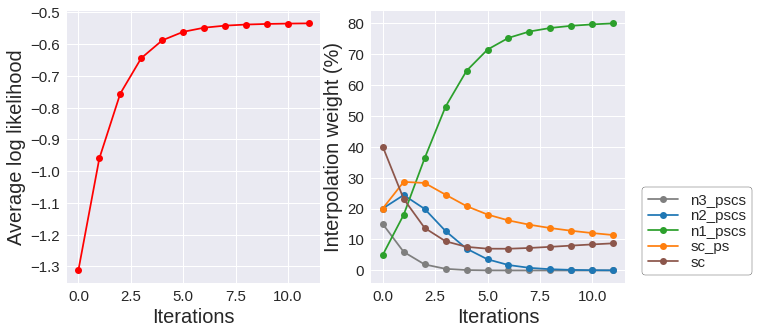

In [17]:
L=langs[0]
with open("sample-data/"+L+"/"+L+"-dev_avg_ll.pickle", 'rb') as outp:
    avg_ll = pickle.load(outp)
plot_utils.plot_em_iteration(avg_ll)

### Ploting average log likehood [Bangla]

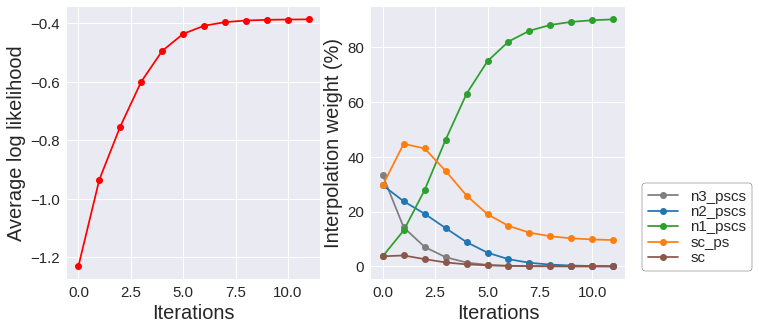

In [18]:
L=langs[3]
with open("sample-data/"+L+"/"+L+"-dev_avg_ll.pickle", 'rb') as outp:
    avg_ll = pickle.load(outp)
plot_utils.plot_em_iteration(avg_ll)